In [2]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
from pandas import json_normalize
import pykrev as pk 

In [3]:
#1 get collections
url="https://dsfp.norman-data.eu/api/1/metastore/schemas/dataset/all"
r = requests.get(url)
json = r.json()
dataframe = pd.DataFrame(json)
print(f"There are {len(dataframe['internal_id'].unique())} collections.")
print(f"There are {len(dataframe['participating_labs'].unique())} participating labs.")
dataframe

There are 85 collections.
There are 32 participating labs.


,uuid,internal_id,title,participating_labs
0,27df0a3e-3578-4a30-b9e4-1505f9da010d,333,LIFE APEX,"Trace Analysis Mass Spectrometry (TrAMS), Envi..."
1,7d20c4fb-64d0-4e29-bd51-331253cd5bc4,348,JDS4,"Trace Analysis Mass Spectrometry (TrAMS), Anal..."
2,980267da-34e0-5002-98c9-da2dcd3b6eec,1183,LIFE APEX GC,Trace Analysis Mass Spectrometry (TrAMS)
3,cf959f47-c2c0-5f37-bfc3-49b86b4d4b33,1184,Black-tailed godwit samples GC,Trace Analysis Mass Spectrometry (TrAMS)
4,379ec238-d44f-50e5-8d1f-74ff7a749463,1185,EODY,Trace Analysis Mass Spectrometry (TrAMS)
...,...,...,...,...
80,efa704d5-3592-4e82-ad78-d4d24884ebd2,2593,PARC Soil EDCs campaign LC NKUA,Trace Analysis Mass Spectrometry (TrAMS)
81,e8ff3e9e-dd37-4817-b7c6-e18d942ae407,2611,NTS of airborne organic substances in PDMS-foa...,Environmental Cheminformatics - LCSB
82,cfd3a5a5-38f6-44a7-8f5a-1c9591d078f3,2623,NTS of airborne organic substances in PDMS-foa...,Trace Analysis Mass Spectrometry (TrAMS)
83,7b77cda3-4f15-4ead-af4c-527e61384e92,2639,PARC Soil EDCs campaign LC BfG,German Federal Institute of Hydrology (BfG)


In [4]:
# 3 collection files
for iid in dataframe['internal_id'].unique():
    url = f"https://dsfp.norman-data.eu/data/{iid}/files.csv"
    r = requests.get(url)
    csv_file = StringIO(r.content.decode('utf-8'))
    files = pd.read_csv(csv_file)
    break

In [5]:
#4 component lists
for cl in files['component_list']:
    url=cl
    r = requests.get(url)
    json = r.json()
    components = json_normalize(r.json(),record_path='fullscan')
    break


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='m/z', ylabel='Counts'>,
 (503.40739214712374, 512.769503370997, 221.11730279520216))

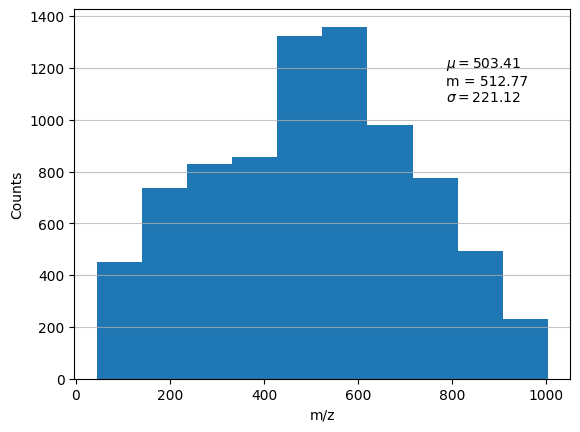

In [11]:
pk.mass_histogram(pk.msTuple(components['molecular_formula'],components['max_intensity'],components['mz']),method='mz', summary_statistics=True, density=False)